In [1]:
import sklearn.cluster
import scipy.cluster
import sklearn.datasets
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D

# Lectura Datos

In [2]:
ruta='C:/Users/ggalv/Google Drive/Respaldo/Magister/Big Data/Trabajo final/Datos Censo/Censo2017_16R_ManzanaEntidad_CSV/Censo2017_Manzanas.csv'
archivo = pd.read_csv(ruta,sep=';')
archivo

,REGION,PROVINCIA,COMUNA,DC,AREA,ZC_LOC,MZ_ENT,ID_ZONA_LOC,ID_MANZENT,PERSONAS,...,MATREC,MATIRREC,P05_1,P05_2,P05_3,P05_4,REGION_15R,PROVINCIA_15R,COMUNA_15R,ID_MANZENT_15R
0,1,11,1101,1,1,1,1,7849,1101011001001,15,...,0,0,0,0,0,0,1,11,1101,1101011001001
1,1,11,1101,1,1,1,10,7849,1101011001010,70,...,1,0,15,0,0,0,1,11,1101,1101011001010
2,1,11,1101,1,1,1,11,7849,1101011001011,36,...,5,0,15,0,0,0,1,11,1101,1101011001011
3,1,11,1101,1,1,1,12,7849,1101011001012,65,...,9,4,24,0,0,0,1,11,1101,1101011001012
4,1,11,1101,1,1,1,13,7849,1101011001013,39,...,0,0,9,0,0,0,1,11,1101,1101011001013
5,1,11,1101,1,1,1,14,7849,1101011001014,160,...,5,0,61,0,0,0,1,11,1101,1101011001014
6,1,11,1101,1,1,1,15,7849,1101011001015,19,...,2,0,7,0,0,0,1,11,1101,1101011001015
7,1,11,1101,1,1,1,16,7849,1101011001016,456,...,4,1,163,0,0,0,1,11,1101,1101011001016
8,1,11,1101,1,1,1,17,7849,1101011001017,203,...,35,0,80,0,0,0,1,11,1101,1101011001017
9,1,11,1101,1,1,1,18,7849,1101011001018,132,...,14,0,43,0,0,0,1,11,1101,1101011001018


In [3]:
archivo=archivo.replace('*', '0')

# Cluster

In [4]:
cosa_importante = archivo[['EDAD_0A5','INMIGRANTES']]
k_means = sklearn.cluster.KMeans(10)
clusters=k_means.fit(cosa_importante.values.reshape(-1,1))

lebels_cluster=clusters.labels_
cluster_centers = clusters.cluster_centers_
n_clusters_ = lebels_cluster.max()+1

In [5]:
print(clusters)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [6]:
edad=list(archivo['EDAD_0A5'])
edad = [int(i) for i in edad]

inmigrantes=list(archivo['INMIGRANTES'])
inmigrantes = [int(i) for i in inmigrantes]

In [7]:
print(len(edad))
print(len(inmigrantes))

180499
180499


In [8]:
datos=[]
for i in range(len(edad)):
    datos.append(edad[i])
    datos.append(inmigrantes[i])

datos=np.asarray(datos)    
datos=np.reshape(datos,(180499,2))    
print(len(datos))
print(datos)

print(cluster_centers)

180499
[[ 0  0]
 [ 0 12]
 [ 0 11]
 ...
 [ 0  0]
 [ 0  7]
 [ 0  0]]
[[ 7.17712575e+00]
 [ 2.96913265e+02]
 [ 9.22090909e+02]
 [ 1.59735876e+02]
 [ 4.38301800e+01]
 [-9.37916411e-12]
 [ 8.54461671e+01]
 [ 1.73755556e+03]
 [ 5.34964286e+02]
 [ 1.96099062e+01]]


# Graficar

In [11]:
X=datos

In [12]:
print(X['EDAD_0A5', 0])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

b
g
r
c
m
y
k
b
g
r


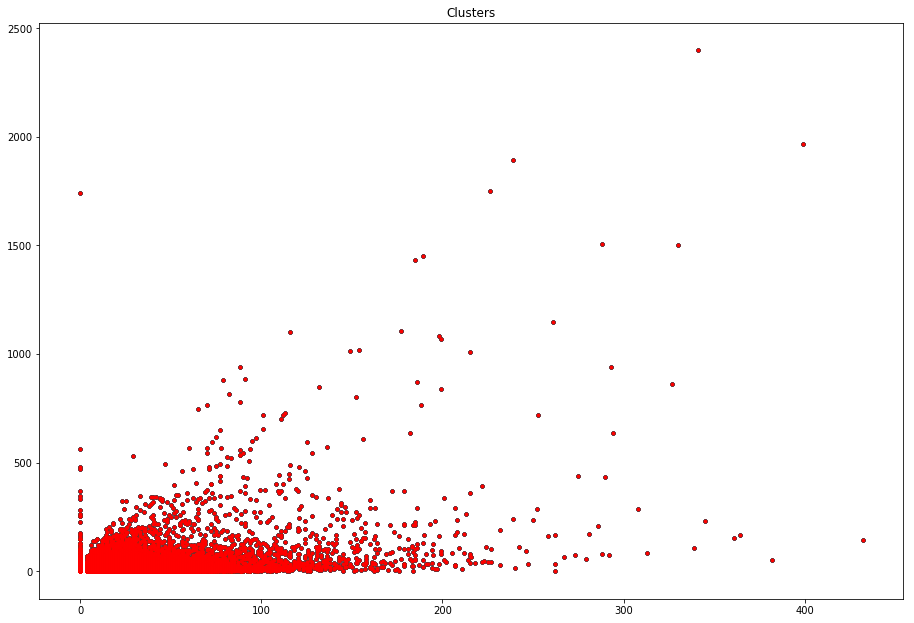

In [26]:

fig = plt.figure(1)
axis=fig.add_axes([0,0,2,2])
labels1=lebels_cluster

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    print (col)
    index=np.where(np.isin(lebels_cluster,k))
    plt.scatter(X[:,0], X[:,1], c=col, marker='.')
plt.title('Clusters' % n_clusters_)
plt.show()

In [21]:
lebels_cluster

array([5, 5, 5, ..., 0, 5, 5])